Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 02: Decision Trees

## Introduction
By now everyone should have found a group. If someone still has none but wants to participate in the course please contact one of the tutors.

This week's sheet should be solved and handed in before the end of **Tuesday, May 4th, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whom ever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

The cartesian plane is also known as the coordinate system with two dimensions, X and Y. These can assume any real number from negative infinity to infinity and points are denoted in tuples of 2: $(X,Y)$. The euclidean space is the cartesian plane with one extra dimension: Z. It is a three-dimensional space where points are denoted in tuples of 3: $(X,Y,Z)$.

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

The euclidean norm of a vector denotes the length of that vector in the space from the origin point. You add and substact two vectors by adding or substracting each component from eachother individually. The euclidean distance for two points in a 2 dimensional space is defined as: $d(x,y) = \sqrt{(x_2 - x_1)^2-(y_2 - y_1)^2}$. There are many other ways to measure distances as seen in the lecture. 

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

The scalar product is the sum of multiplying each column of one vector with each row of the other vector. It can be used to compute the angle between both vectors and therefore conclude if they are in a perpendicular, orthogonal, etc. to each other. 

## Assignment 1: Decision Trees [4 Points]
Draw the decision trees for the following boolean functions. Either use pen and paper and scan/photograph the result or employ your ASCII artist within below.

Note: $\oplus := xor$, that means one of the operands has to be true, while the other one has to be false:

$\oplus$ | $B$ | $\neg B$
---------|-----|---------
$A$      |  f  |    t
$\neg A$ |  t  |    f

**a)** $\neg A \wedge B$


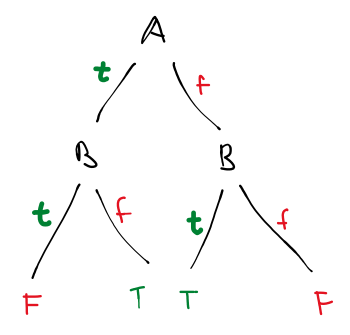

**b)** $A \oplus B$

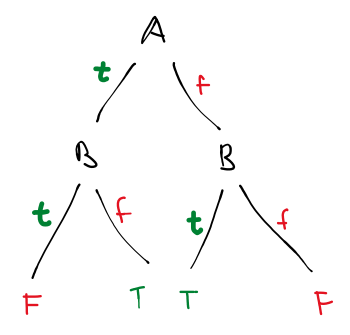

**c)** $A \vee (B \wedge C) \vee (\neg C \wedge D)$

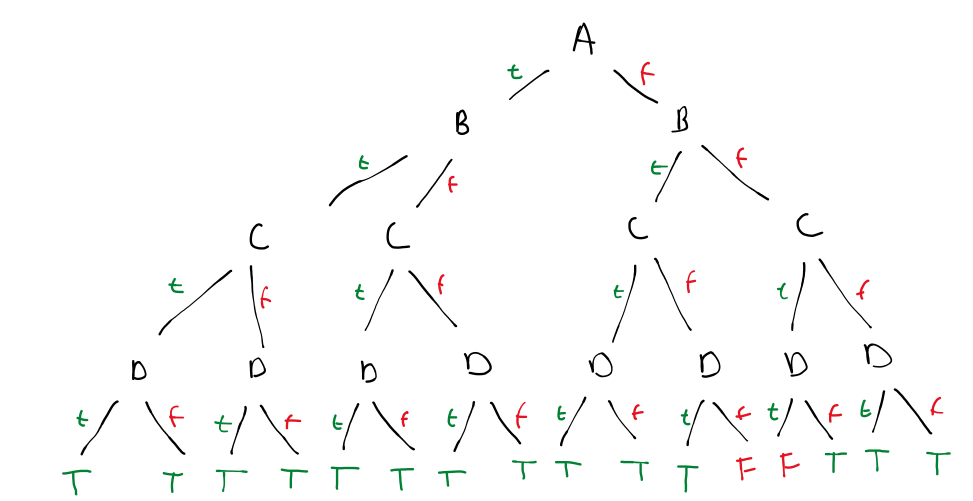

**d)** $(A \rightarrow (B \wedge \neg C)) \vee (A \wedge B)$

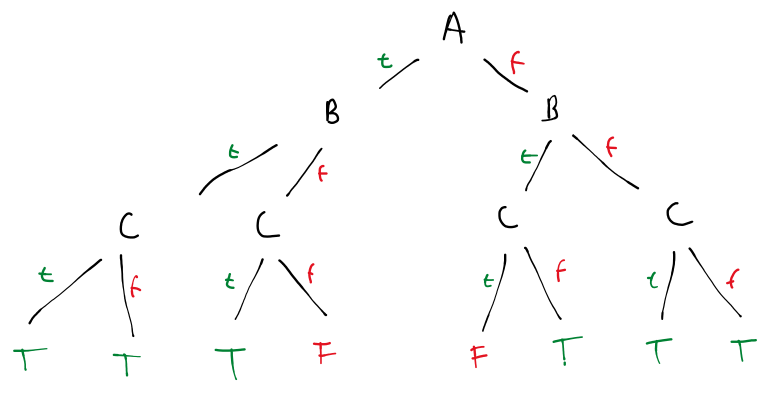

## Assignment 2: Entropy and Information Gain [8 Points]

In many machine learning applications it is crucial to determine which criterions are necessary for a good classification. Decision trees have those criterions close to the root, imposing an order from significant to less significant criterions. One way to select the most important criterion is to compare its information gain or its entropy to others. The following dataset is a hands-on example for this method.

Consider the following attributes with their possible values:

  * $raining = \{yes, no\}$
  * $tired = \{yes, no\}$
  * $late = \{yes, no\}$
  * $distance = \{short, medium, long\}$

And a training data set consisting of those attributes:

| #  | raining | tired | late | distance | attend_party |
|----|---------|-------|------|----------|--------------|
| 1  | yes     | no    | no   | short    | **yes**      |
| 2  | yes     | no    | yes  | medium   | **no**       |
| 3  | no      | yes   | no   | long     | **no**       |
| 4  | yes     | yes   | yes  | short    | **no**       |
| 5  | yes     | no    | no   | short    | **yes**      |
| 6  | no      | no    | no   | medium   | **yes**      |
| 7  | no      | yes   | no   | long     | **no**       |
| 8  | yes     | no    | yes  | short    | **no**       |
| 9  | yes     | yes   | no   | short    | **yes**      |
| 10 | no      | yes   | no   | medium   | **no**       |
| 11 | no      | yes   | no   | long     | **no**       |
| 12 | no      | yes   | yes  | short    | **no**       |

**a)** Build the root node of a decision tree from the training samples given in the table above by calculating the information gain for all four attributes (raining, tired, late, distance).

$$\operatorname{Gain}(S,A) = \operatorname{Entropy}(S) - \sum_{v \in \operatorname{Values}(A)} \frac{|S_v|}{|S|}\operatorname{Entropy}(S_v)$$

$$\operatorname{Entropy}(S) = -p_{\oplus} log_{2} p_{\oplus} - p_{\ominus} log_{2} p_{\ominus}$$

$S$ is the set of all data samples. $S_v$ is the subset for which attribute $A$ has value $v$. An example for attribute **tired** with value $yes$ would be:
$$|S_{yes}| = 7, S_{yes}:[1+, 6−]$$

$\operatorname{Entropy}(S) = ( - \left(\frac{4}{12}\right)log_{2}\left(\frac{4}{12}\right) ) + ( - \left(\frac{8}{12}\right)log_{2}\left(\frac{8}{12}\right )) = 0.918$

$\operatorname{Gain}(S,raining) = 0.918 - (\left(\frac{6}{12}\right) \cdot 1.0 + \left(\frac{6}{12}\right) \cdot 0.650 ) = 0.093$

$\operatorname{Gain}(S,tired) = 0.918 - (\left(\frac{7}{12}\right) \cdot 0.591 + \left(\frac{5}{12}\right) \cdot 0.970 ) = 0.169$

$\operatorname{Gain}(S,late) = 0.918 - (\left(\frac{4}{12}\right) \cdot 0.0 + \left(\frac{8}{12}\right) \cdot 1.0 ) = 0.252$

$\operatorname{Gain}(S,distance) = 0.918 - (\left(\frac{6}{12}\right) \cdot 1.0 + \left(\frac{3}{12}\right) \cdot 0.918 + \left(\frac{3}{12}\right) \cdot 0.0) = 0.189$

The root node of the tree would be the late attribute since it entails the most information from the start.

**b)** Perform the same calculation as in **a)** but use the gain ratio instead of the information gain. Does the result for the root node change?

$$\operatorname{GainRatio}(S,A) = \frac{\operatorname{Gain}(S,A)}{\operatorname{SplitInformation}(S,A)}$$

$$\operatorname{SplitInformation}(S,A) = - \sum_{v \in \operatorname{Values}(A)} \frac{|S_v|}{|S|} \log_{2} \frac{|S_{v}|}{|S|}$$

$\operatorname{GainRatio}(S,raining) = \frac{0.093}{1.0} = 0.093$

$\operatorname{GainRatio}(S,tired) = \frac{0.169}{0.98} = 0.172$

$\operatorname{GainRatio}(S,late) = \frac{0.252}{0.92} = 0.27$

$\operatorname{GainRatio}(S,distance) = \frac{0.189}{1.0} = 0.189$

The root node would still be late, since it entails the most information after gain ratio.

## Assignment 3: ID3 algorithm [4 Points]

Implement the following two functions in Python. Take a look at the `assert`s to see how the function should behave. An assert is a condition that your function is required to pass. Most of the conditions here are taken from the lecture slides (ML-03, Slide 12 & 13). Don't worry if you do not get all asserts to pass, just comment the failing ones out.

**a) Entropy**

$$\operatorname{Entropy}(S) = - \sum_{i=1...c} p_i \log_2 p_i$$

In [5]:
from math import log2
from collections import Counter
def entropy(s):
    """
    Calculate the entropy for a given target value set.

    Args:
        s (list): Target classes for specific observations.

    Returns:
        The entropy of s.
    """
    num = len(s)
    count = Counter(s).values()
    entropy = 0
    
    entropy -= sum([(c/num * log2 (c/num)) for c in count])
    #print(entropy)
    return entropy

        

# See ML-03, Slide 12 & 13

In [6]:
assert entropy([1,1,1,0,0,0]) == 1.0
assert round(entropy([1,1,1,1,0,0,0]), 3) == 0.985
assert round(entropy([1,1,1,1,1,1,0]), 3) == 0.592
assert round(entropy([1,1,1,1,1,1,0,0]), 3) == 0.811
assert round(entropy([2,2,1,1,0,0]), 3) == 1.585
assert round(entropy([2,2,2,1,0]), 3) == 1.371
assert round(entropy([2,2,2,0,0]), 3) == 0.971
assert entropy(['yes','yes','yes','no','no','no']) == 1.0

**b)** Information Gain

$$\operatorname{Gain}(S,A) = \operatorname{Entropy}(S) - \sum_{v \in \operatorname{Values}(A)} \frac{|S_v|}{|S|} \operatorname{Entropy}(S_v)$$

In [7]:
def gain(targets, attr_values):
    """
    Calculates the expected reduction in entropy due to sorting on A.

    Args:
        targets (list): Target classes for observations in attr_values.
        attr_values (list): Values of each instance for the respective attribute.

    Returns:
        The information gain of
    """
    entropy_targ = entropy(targets)    
    num = len(attr_values)
    
    #Calculate the gain
    for (c, value) in Counter(attr_values).items():
        attr_c = []
        for i,v in enumerate(attr_values):
            if v == c:
                attr_c.append(targets[i])
        entropy_targ -= entropy(attr_c) * value/num
    return entropy_targ
    
# See ML-03, Slide 12 & 13


In [8]:
# The lists here can each be seen as one column of a table such as the one in assignment 2.
# Assert targets would be the last column, while the attribute values are the values of one attribute, here the
# example rain and distance
assert_targets = ["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no"]
assert_attribute_values_1 = ["yes", "yes","yes","yes","no", "no", "no", "yes", "no", "no", "no","yes", "no", "yes"]
assert_attribute_values_2 = ["high","low","medium","high","high","medium","low","medium","low","high","high","medium","low","low"]
assert_attribute_values_3 = [0,1,0,0,0,1,1,0,0,0,1,1,0,1]
assert round(gain(assert_targets, assert_attribute_values_1), 3) == 0.152
assert round(gain(assert_targets, assert_attribute_values_2), 3) == 0.05
assert round(gain(assert_targets, assert_attribute_values_3), 3) == 0.048

**c)** ID3

In the next two cells we have implemented the ID3 algorithm following the pseudocode from [Wikipedia](https://en.wikipedia.org/wiki/ID3_algorithm#Pseudocode) - it relies on your two functions from above, `entropy` and `gain`. Try to understand what the code does and replace `# YOUR CODE HERE` with meaningful comments describing the respective parts of the code. Though its often annoying, being able to read other peoples code is one of the key skills (and obstacles) in software engineering. So give it a try! Otherwise you are of course welcome to write your own implementation.

In [9]:
from collections import Counter, namedtuple


class Node(namedtuple('Node', 'label children')):
    """
    A small node representation with a pretty string representation.
    """
    def __str__(self, level=0):
        return_str ='{}{!s}\n'.format(' ' * level * 4, self.label)
        for child in self.children:
            return_str += child.__str__(level + 1)
        return return_str

def id3(examples, attributes, target_attribute=None):
    """
    Calculate a tree of Nodes (fields: label [string], children [list])
    using the ID3 algorithm found as pseudocode on Wikipedia.
    """
    # Create a root node of the tree
    if all(target == examples['targets'][0] for target in examples['targets']):
        return Node('Result: {!s}'.format(examples['target_names'][examples['targets'][0]]), [])

    # If number of attributes is empty, return the single node tree root with label of most common value of the
    # target attribute in the examples 
    if len(attributes) == 0:
        attr = Counter(data_sample[target_attribute] for data_sample in examples['data']).most_common(1)
        return Node('Attribute: {!s}, {!s} occurences'.format(examples['attributes'][target_attribute], attr), [])

    # Caluculate gain for all attributes and get max gain for best root node 
    gains = [gain(examples['targets'], [r[attribute] for r in examples['data']])
             for attribute in attributes]
    max_gain_attribute = attributes[gains.index(max(gains))]

    # Assign A as decision attribute for node.
    root = Node('Attribute: {!s} (gain {!s})'.format(examples['attributes'][max_gain_attribute],
                                                     round(max(gains), 4)), [])

    # For each value vi of A :
    for vi in set(data_sample[max_gain_attribute] for data_sample in examples['data']):
        # Add a subtree below root
        child = Node('Value: {!s}'.format(vi), [])
        root.children.append(child)

        # Let examples vi be the subset of examples that have the value vi for A
        vi_indices = [idx for idx, data_sample in enumerate(examples['data'])
                          if data_sample[max_gain_attribute] == vi]
        examples_vi = dict(examples)
        examples_vi['data'] = [examples['data'][i] for i in vi_indices]
        examples_vi['targets'] = [examples['targets'][i] for i in vi_indices]

        if examples_vi['data']:
            # Add the subtree of ID3 below
            child.children.append(
                id3(examples_vi,
                    [attribute_ for attribute_ in attributes if not attribute_ == max_gain_attribute],
                    max_gain_attribute)
            )

        else:
            # Else, if examples is empty, add a child with most common target attribute value 
            attr = Counter(examples_vi['targets']).most_common(1)
            label = 'Attribute: {!s}, {!s} occurences'.format(examples['attributes'][target_attribute], attr)
            child.children.append(Node(label, []))

    return root

**d)** The algorithm is applied to two data sets. Run those and discuss the differences. For which data set is the ID3 algorithm better suited and why?

This code runs the ID3 algorithm on the party data set which you already know from assignment 2.

In [10]:
import json

with open('party.json', 'r') as party_file:
    party = json.load(party_file)

# Make sure our gain function handles the data set as expected.
assert round(gain(party['targets'], [r[2] for r in party['data']]), 3) == 0.252

# Apply ID3 algorithm
tree_party = id3(party, list(range(len(party['attributes']))))

print(tree_party)

Attribute: late (gain 0.2516)
    Value: yes
        Result: no
    Value: no
        Attribute: distance (gain 0.75)
            Value: short
                Result: yes
            Value: medium
                Attribute: tired (gain 1.0)
                    Value: yes
                        Result: no
                    Value: no
                        Result: yes
            Value: long
                Result: no



This code runs the ID3 algorithm on the famous iris flowers data set.

In [11]:
import json

with open('iris.json', 'r') as iris_file:
    iris = json.load(iris_file)

# Make sure our gain function handles the data set as expected.
assert round(gain(iris['targets'], [r[2] for r in iris['data']]), 3) == 1.446

# Apply ID3 algorithm
tree_iris = id3(iris, list(range(len(iris['attributes']))))

print(tree_iris)

Attribute: petal length (gain 1.4463)
    Value: 4.5
        Attribute: sepal length (gain 0.5436)
            Value: 6.4
                Result: Iris-versicolor
            Value: 5.6
                Result: Iris-versicolor
            Value: 4.9
                Result: Iris-virginica
            Value: 5.7
                Result: Iris-versicolor
            Value: 5.4
                Result: Iris-versicolor
            Value: 6.0
                Result: Iris-versicolor
            Value: 6.2
                Result: Iris-versicolor
    Value: 4.6
        Result: Iris-versicolor
    Value: 3.0
        Result: Iris-versicolor
    Value: 5.3
        Result: Iris-virginica
    Value: 1.5
        Result: Iris-setosa
    Value: 3.7
        Result: Iris-versicolor
    Value: 1.6
        Result: Iris-setosa
    Value: 3.6
        Result: Iris-versicolor
    Value: 6.1
        Result: Iris-virginica
    Value: 4.7
        Result: Iris-versicolor
    Value: 6.9
        Result: Iris-virginica
  

For the party set, because it is much less complex, not noisy, arragned easier and easier to compute.

## Assignment 4: Decision Trees on Iris Flowers [4 Points]

In this exercise we are going to examine and compare two decision trees that were generated from the iris flower data set to classify three variations of Iris flowers. The Iris data set is a classical example of a labeled dataset, i.e. every sample consists of two parts: features and labels. There are four features per sample in this data set (sepal length ($x_1$), sepal width ($x_2$), petal length ($x_3$) and petal width ($x_4$) in cm) and a corresponding label (Iris Setosa, Iris Versicolour, Iris Virginica). These samples are by nature **noisy**, no matter how carefully the measurement was taken - slight deviation from the actual length **cannot be avoided**. We want to learn how the features are related to the label so that we could (in the future) predict the label of a new sample automatically. One way to obtain such a `classifier` is to train a decision tree on the data.

Here are two decisions tree generated by the data set. We will now take a closer look.

**Tree 1:**

**Tree 2:**

**a)** What does it mean that the features $x1$ and $x2$ do not appear in the decision trees?

It means that we used reduced error pruning. The features produced by noise, as stated in the text above, were removed to achieve a better generalization leaving only the nodes that have a significant impact or information gain. 

**b)** With which method from the lecture might the second tree have been generated from the first one? Explain the procedure.

The second tree might be generated from reduced error pruning, removing nodes based on similar preconditions if the performance on the validation set increases.

**c)** After training the tree we can calculate the accuracy, i.e. the percentage of the training set that is classified correctly. Although the first tree was trained on the data set until no improvement of the accuracy was possible, its accuracy is *only* 98%. Explain why it is not 100 %

Since the dataset might be inconsistent and outliers might be in the classes, it cannot reach an accuracy of 100%. If it would be 100% we would be overfitting the data as we won't generalize as well (extensive decision tree).

**d)** Tree 2 only has a 96% accuracy on the training set. Why might this tree still be preferable over tree 1?

The smaller size, better generalization and therefore ease of computing might outweigh the slight decrease of accuracy. 